# Importing libraries

In [2]:
import seaborn as sb
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

importing data

In [13]:
data=pd.read_csv("Desktop/data/Ad-Click-Prediction-master/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


plotting missing values
-----------------------------
as we see we dont have any

<AxesSubplot:>

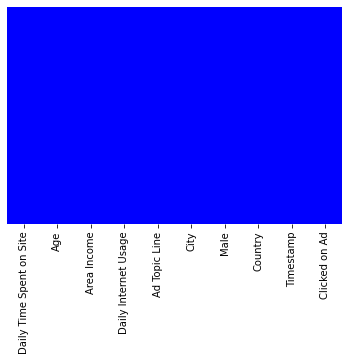

In [9]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="winter")

# Correlation heatmap

**from the heat map below we see some good relation between parameters except sex (male) so we can drop it later

(if you are woundering why i have centered my heat map its because we hava both positive and negative relation between 
oure parameters)

<AxesSubplot:>

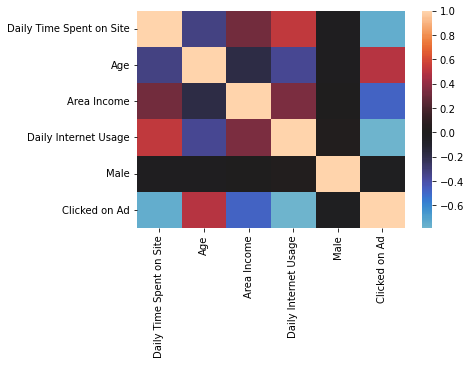

In [13]:
sb.heatmap(data.corr(),center=0)

# Preprocessing

In this example I have dropped non numerical items but maybe we can take advantage of them and optimize our algorithm 

**I will do it later as a seperated project to compare the two models it might be interesting

In [14]:
data=data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'],axis=1)

In [15]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [16]:
x=data.drop("Clicked on Ad",axis=1)
y=data["Clicked on Ad"]

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33)

# LogisticRegression

In [18]:
LogesticReg=LogisticRegression()

In [19]:
LogesticReg.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
prediction=LogesticReg.predict(xtest)

In [21]:
print(metrics.classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       162
           1       0.89      0.91      0.90       168

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



# As a conclusion:
We got a 90 percent accurasy, which is really good actually but
I belive that it would go higher if we catagorize non-numeric values 